# Programming Exercise 1: Linear Regression

## Introduction

In this exercise, you will implement linear regression and get to see it work on data. Before starting on this programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics.

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook. The assignment can be promptly submitted to the coursera grader directly from this notebook (code and instructions are included below).

Before we begin with the exercises, we need to import all libraries required for this programming exercise. Throughout the course, we will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, and [`matplotlib`](https://matplotlib.org/) for plotting.

You can find instructions on how to install required libraries in the README file in the [github repository](https://github.com/dibgerge/ml-coursera-python-assignments).

In [12]:
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Debugging

Here are some things to keep in mind throughout this exercise:

- Python array indices start from zero, not one (contrary to OCTAVE/MATLAB). 

- There is an important distinction between python arrays (called `list` or `tuple`) and `numpy` arrays. You should use `numpy` arrays in all your computations. Vector/matrix operations work only with `numpy` arrays. Python lists do not support vector operations (you need to use for loops).

- If you are seeing many errors at runtime, inspect your matrix operations to make sure that you are adding and multiplying matrices of compatible dimensions. Printing the dimensions of `numpy` arrays using the `shape` property will help you debug.

- By default, `numpy` interprets math operators to be element-wise operators. If you want to do matrix multiplication, you need to use the `dot` function in `numpy`. For, example if `A` and `B` are two `numpy` matrices, then the matrix operation AB is `np.dot(A, B)`. Note that for 2-dimensional matrices or vectors (1-dimensional), this is also equivalent to `A@B` (requires python >= 3.5).

<a id="section1"></a>
## 1 Simple python and `numpy` function

The first part of this assignment gives you practice with python and `numpy` syntax and the homework submission process. In the next cell, you will find the outline of a `python` function. Modify it to return a 5 x 5 identity matrix by filling in the following code:

```python
A = np.eye(5)
```
<a id="warmUpExercise"></a>

In [13]:
def warmUpExercise():
    """
    Example function in Python which computes the identity matrix.
    
    Returns
    -------
    A : array_like
        The 5x5 identity matrix.
    
    Instructions
    ------------
    Return the 5x5 identity matrix.
    """    
    # ======== YOUR CODE HERE ======
    A = np.eye(5)   # modify this line
    
    # ==============================
    return A

The previous cell only defines the function `warmUpExercise`. We can now run it by executing the following cell to see its output. You should see output similar to the following:

```python
array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])
```

In [14]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 2 Linear regression with one variable

Now you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next. 

The file `Data/ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss. 

We provide you with the code needed to load this data. The dataset is loaded from the data file into the variables `x` and `y`:

In [15]:
# Read comma separated data
data = np.loadtxt(os.path.join('ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size  # number of training examples

### 2.1 Plotting the Data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Many other problems that you will encounter in real life are multi-dimensional and cannot be plotted on a 2-d plot. There are many plotting libraries in python (see this [blog post](https://blog.modeanalytics.com/python-data-visualization-libraries/) for a good summary of the most popular ones). 

In this course, we will be exclusively using `matplotlib` to do all our plotting. `matplotlib` is one of the most popular scientific plotting libraries in python and has extensive tools and functions to make beautiful plots. `pyplot` is a module within `matplotlib` which provides a simplified interface to `matplotlib`'s most common plotting tasks, mimicking MATLAB's plotting interface.

<div class="alert alert-block alert-warning">
You might have noticed that we have imported the `pyplot` module at the beginning of this exercise using the command `from matplotlib import pyplot`. This is rather uncommon, and if you look at python code elsewhere or in the `matplotlib` tutorials, you will see that the module is named `plt`. This is used by module renaming by using the import command `import matplotlib.pyplot as plt`. We will not using the short name of `pyplot` module in this class exercises, but you should be aware of this deviation from norm.
</div>


In the following part, your first job is to complete the `plotData` function below. Modify the function and fill in the following code:

```python
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')
```

In [20]:
def plotData(x, y):
    """
    Plots the data points x and y into a new figure. Plots the data 
    points and gives the figure axes labels of population and profit.
    
    Parameters
    ----------
    x : array_like
        Data point values for x-axis.

    y : array_like
        Data point values for y-axis. Note x and y should have the same size.
    
    Instructions
    ------------
    Plot the training data into a figure using the "figure" and "plot"
    functions. Set the axes labels using the "xlabel" and "ylabel" functions.
    Assume the population and revenue data have been passed in as the x
    and y arguments of this function.    
    
    Hint
    ----
    You can use the 'ro' option with plot to have the markers
    appear as red circles. Furthermore, you can make the markers larger by
    using plot(..., 'ro', ms=10), where `ms` refers to marker size. You 
    can also set the marker edge color using the `mec` property.
    """
    
    # ====================== YOUR CODE HERE ======================= 
    plt.plot(x, y, 'ro', ms=10, mec='k')
    plt.ylabel('Profit in $10,000')
    plt.xlabel('Population of City in 10,000s')
    
    
    # =============================================================


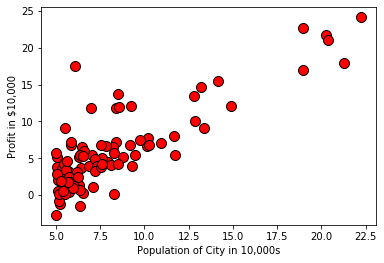

In [21]:
plotData(X, y)

To quickly learn more about the `matplotlib` plot function and what arguments you can provide to it, you can type `?pyplot.plot` in a cell within the jupyter notebook. This opens a separate page showing the documentation for the requested function. You can also search online for plotting documentation. 

To set the markers to red circles, we used the option `'or'` within the `plot` function.

<a id="section2"></a>
### 2.2 Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

#### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

<div class="alert alert-block alert-warning">
**Implementation Note:** We store each example as a row in the the $X$ matrix in Python `numpy`. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>


#### 2.2.2 Implementation

We have already set up the data for linear regression. In the following cell, we add another dimension to our data to accommodate the $\theta_0$ intercept term. Do NOT execute this cell more than once.

In [22]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).

X = np.stack([np.ones(m), X], axis=1)

In [23]:
X

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

<a id="section2"></a>
#### 2.2.3 Computing the cost $J(\theta)$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

Your next task is to complete the code for the function `computeCost` which computes $J(\theta)$. As you are doing this, remember that the variables $X$ and $y$ are not scalar values. $X$ is a matrix whose rows represent the examples from the training set and $y$ is a vector whose each elemennt represent the value at a given row of $X$.
<a id="computeCost"></a>

In [36]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. 
    You should set J to the cost.
    """
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly
    J = 0
    
    # ====================== YOUR CODE HERE =====================
    hiro = np.dot(X, theta)
    print(hiro)
    J = (np.sum((hiro - y)**2))/(2*m)
    print(J)
    # ===========================================================
    return J

Once you have completed the function, the next step will run `computeCost` two times using two different initializations of $\theta$. You will see the cost printed to the screen.

In [37]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
32.072733877455676
With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

[11.2202 10.0554 16.0372 13.0064 10.7196 15.7658 13.9528 16.1562 11.9724
  9.1092 10.4214 27.328  10.468  15.8168 10.2814  9.7588 11.7308  9.2602
 11.8592 13.1416 11.3782 39.54    9.9802 11.6522 10.1298 36.89   24.656
 20.914  25.352  43.406   9.5048 12.1788 17.4964 10.7836 15.4222 14.8668
 15.1918 10.2126 24.672  11.7068  9.8138 12.765  22.416  10.5474 14.6494
 13.1862  9.1404 10.6028 22.4    10.0832 14.0804  9.6154 13.8478 14.2062
 11.6656 11.7178 11.5484 10.2794 17.6204 17.9072 16.6508  9.3586 41.558
 28.816  36.918  13.4364 15.5902 19.472   9.9988 39.682  19.272  13.669
 11.0124 13.4518 

*You should now submit your solutions by executing the following cell.*

<a id="section3"></a>
#### 2.2.4 Gradient descent

Next, you will complete a function which implements gradient descent.
The loop structure has been written for you, and you only need to supply the updates to $\theta$ within each iteration. 

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. [Refer to the equations in this notebook](#section2) and to the video lectures if you are uncertain. A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. 

The starter code for the function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a `python` list. Assuming you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

<div class="alert alert-box alert-warning">
**Vectors and matrices in `numpy`** - Important implementation notes

A vector in `numpy` is a one dimensional array, for example `np.array([1, 2, 3])` is a vector. A matrix in `numpy` is a two dimensional array, for example `np.array([[1, 2, 3], [4, 5, 6]])`. However, the following is still considered a matrix `np.array([[1, 2, 3]])` since it has two dimensions, even if it has a shape of 1x3 (which looks like a vector).

Given the above, the function `np.dot` which we will use for all matrix/vector multiplication has the following properties:
- It always performs inner products on vectors. If `x=np.array([1, 2, 3])`, then `np.dot(x, x)` is a scalar.
- For matrix-vector multiplication, so if $X$ is a $m\times n$ matrix and $y$ is a vector of length $m$, then the operation `np.dot(y, X)` considers $y$ as a $1 \times m$ vector. On the other hand, if $y$ is a vector of length $n$, then the operation `np.dot(X, y)` considers $y$ as a $n \times 1$ vector.
- A vector can be promoted to a matrix using `y[None]` or `[y[np.newaxis]`. That is, if `y = np.array([1, 2, 3])` is a vector of size 3, then `y[None, :]` is a matrix of shape $1 \times 3$. We can use `y[:, None]` to obtain a shape of $3 \times 1$.
<div>
<a id="gradientDescent"></a>

In [42]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : arra_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        hiro = np.dot(X, theta)
        print(hiro)
        theta[0] = theta[0] - ((alpha / m)*(np.sum((hiro - y)*X[:, 0])))
        theta[1] = theta[1] - ((alpha / m)*(np.sum((hiro - y)*X[:, 1])))
        print(theta)
        
        
        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

After you are finished call the implemented `gradientDescent` function and print the computed $\theta$. We initialize the $\theta$ parameters to 0 and the learning rate $\alpha$ to 0.01. Execute the following cell to check your code.

In [43]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[0.05839135 0.6532885 ]
[ 4.0500494   3.66957418  5.62349474  4.63350136  3.88653129  5.5348435
  4.94263747  5.66236541  4.2957512   3.36050339  3.78912597  9.31156963
  3.80434759  5.55150235  3.74339578  3.57269149  4.21683395  3.40982667
  4.25877507  4.67766366  4.10165919 13.30054919  3.64501053  4.19115971
  3.69387651 12.43494193  8.4387762   7.21647342  8.66612059 14.56335586
  3.48972385  4.36317058  6.10013403  3.90743652  5.42260853  5.24119032
  5.3473497   3.72092265  8.4440025   4.20899449  3.59065693  4.55464943
  7.70709308  3.83028315  5.17017786  4.69223199  3.37069469  3.84837924
  7.70186677  3.67865489  4.98431728  3.52585071  4.90833983  5.02540913
  4.19553675  4.2125875

[ 4.77647908  4.29114688  6.78355773  5.52072734  4.56789624  6.67047466
  5.91505975  6.83314094  5.08989502  3.8968978   4.44364653 11.48804674
  4.46306315  6.69172461  4.38531333  4.16756384  4.98922858  3.95981432
  5.04272846  5.57706054  4.84231226 16.57636818  4.25981362  4.95647866
  4.32214681 15.4722041  10.374716    8.81555298 10.66471533 18.18719776
  4.06173075  5.17589481  7.39155631  4.59456284  6.52730832  6.2958922
  6.43130855  4.35664673 10.38138266  4.97922861  4.19048045  5.42014424
  9.44138485  4.4961464   6.20530908  5.59564383  3.90989777  4.51922968
  9.4347182   4.30273019  5.9682263   4.10781398  5.87130986  6.02064284
  4.96206198  4.98381193  4.91322876  4.38448     7.44322285  7.56272257
  7.0392238   4.00081423 17.41719955 12.10804529 15.48387074  5.69989359
  6.59730816  8.21472105  4.2675636  16.63553471  8.13138791  5.79681003
  4.68989595  5.70631024  3.87381452  5.14131156  5.96689297  3.8818145
  8.24638764  3.9411477   4.45906316  4.00839754  4.9

[-0.86287834  0.88834569]
[ 4.56500264  4.04763011  6.70458323  5.35838417  4.34264971  6.58403472
  5.77874935  6.7574398   4.89910945  3.62735377  4.21019737 11.71964997
  4.23089583  6.60668753  4.14801317  3.91588845  4.79179729  3.69442387
  4.84882909  5.41843634  4.63518195 17.14388874  4.01422831  4.75688531
  4.08067657 15.9668307  10.53282013  8.87072535 10.84196443 18.86106095
  3.80306854  4.99078673  7.35272024  4.37107678  6.43141693  6.18472333
  6.32907951  4.11745408 10.5399269   4.78113715  3.94031795  5.25116085
  9.53787296  4.26616315  6.08816016  5.43824645  3.64121196  4.29077033
  9.5307662   4.05997812  5.83542581  3.85219406  5.7321112   5.89130275
  4.76283722  4.78602305  4.71078017  4.14712483  7.40779767  7.53518645
  6.97712768  3.73813047 18.04022953 12.38057916 15.97926754  5.5493785
  6.50603797  8.23022811  4.02248993 17.20696128  8.14139354  5.6526931
  4.47270352  5.55621876  3.60274659  4.95392038  5.83400445  3.61127471
  8.26398525  3.67452492  4

[ 4.43727675  3.90055275  6.65688483  5.26033341  4.20660708  6.5318274
  5.69642166  6.71171841  4.78388028  3.46455666  4.06920057 11.85953189
  4.09067322  6.5553275   4.00469048  3.7638835   4.67255428  3.53413541
  4.73171925  5.32263173  4.510081   17.48665538  3.86590161  4.63633647
  3.93483526 16.26557142 10.62831063  8.90404793 10.94901796 19.26805559
  3.64684376  4.87898659  7.32926434  4.23609741  6.37350119  6.11758043
  6.267336    3.97298837 10.63568321  4.66149541  3.78922676  5.14909957
  9.5961491   4.12725966  6.01740546  5.3431828   3.4789332   4.15278722
  9.58877652  3.91336261  5.755218    3.69780674  5.64803909  5.81318493
  4.64251101  4.66656406  4.58850684  4.0037689   7.38640185  7.51855539
  6.93962336  3.57947679 18.41652233 12.54518205 16.27847344  5.45847156
  6.45091331  8.23959394  3.87447224 17.55208705  8.14743667  5.56565048
  4.34152533  5.46556767  3.43902909  4.84074132  5.75374349  3.44787619
  8.27461371  3.51349218  4.08624967  3.5878631   4.

[ 4.29214929  3.73343735  6.60268792  5.14892406  4.05202978  6.47250727
  5.60287751  6.65976787  4.6529521   3.27957983  3.90899416 12.01847153
  3.93134647  6.49697011  3.84184128  3.59116918  4.53706542  3.35200901
  4.5986542   5.21377456  4.3679361  17.87612106  3.69736666  4.49936388
  3.76912431 16.60501303 10.7368109   8.94191043 11.07065663 19.7304998
  3.46933468  4.75195463  7.30261277  4.08272824  6.30769493  6.04128987
  6.19718048  3.80884044 10.74448551  4.5255535   3.61755067  5.03313332
  9.66236487  3.96943174  5.93701104  5.23516755  3.29454533  3.9960051
  9.65469025  3.74677199  5.66408256  3.52238545  5.55251286  5.72442422
  4.50579137  4.5308298   4.44957482  3.84088195  7.36209103  7.49965849
  6.89700939  3.39920789 18.84408182 12.73221068 16.61844361  5.35517933
  6.38827838  8.25023579  3.7062884  17.94423327  8.15430311  5.46674904
  4.19247523  5.36256615  3.25300648  4.71214257  5.66254764  3.26221602
  8.28669021  3.33052009  3.9267417   3.40793776  4.5

[ 4.17140343  3.59439755  6.55759617  5.05623163  3.92342168  6.42315301
  5.52504891  6.61654508  4.54402003  3.12567935  3.77570263 12.1507091
  3.79878682  6.44841683  3.70635096  3.44747109  4.42433887  3.20048008
  4.48794425  5.12320553  4.24967174 18.200156    3.5571458   4.38540286
  3.63125301 16.88742801 10.82708298  8.97341198 11.17185984 20.11525277
  3.32164735  4.6462642   7.28043869  3.9551253   6.2529442   5.97781622
  6.13881117  3.67226957 10.83500889  4.41245001  3.47471639  4.93664954
  9.7174563   3.83811913  5.87012299  5.14529899  3.14113487  3.86556257
  9.70953039  3.60816881  5.588258    3.37643517  5.47303516  5.65057543
  4.3920408   4.41789907  4.33398355  3.70536022  7.34186446  7.4839363
  6.86155462  3.24922439 19.19981076 12.88781825 16.90129834  5.26924033
  6.3361662   8.2590898   3.56635966 18.27049841  8.16001599  5.38446317
  4.06846574  5.27686901  3.09823591  4.60514857  5.58667282  3.10774699
  8.29673785  3.17828754  3.79403128  3.25824011  4.4

[ 4.07176173  3.47965936  6.52038562  4.97974014  3.81729191  6.38242496
  5.46082331  6.58087685  4.45412729  2.99867785  3.66570801 12.25983397
  3.68939617  6.40834977  3.59454186  3.32888879  4.33131484  3.07543563
  4.39658437  5.04846631  4.15207781 18.46755559  3.44143297  4.29136013
  3.51747908 17.12048203 10.90157716  8.99940763 11.25537459 20.43275799
  3.19977306  4.55904653  7.26214024  3.84982501  6.20776289  5.92543661
  6.09064374  3.55956878 10.90971044  4.31911493  3.35684692  4.85702936
  9.76291876  3.72975754  5.81492574  5.07113781  3.01453773  3.75791901
  9.75478548  3.49379092  5.52568618  3.25599432  5.4074487   5.58963405
  4.29817175  4.32470656  4.23859552  3.5935252   7.32517312  7.47096206
  6.83229669  3.12545526 19.49336481 13.01622848 17.13471526  5.19832189
  6.29316227  8.26639629  3.4508879  18.53973839  8.16473036  5.31655936
  3.96613083  5.20615016  2.97051639  4.51685516  5.52405952  2.98027632
  8.30502934  3.05266246  3.68451621  3.13470686  4

  3.27160832]
4.681977370846331
[ 3.97327178  3.36624742  6.4836052   4.9041328   3.71238888  6.34216768
  5.3973401   6.54562091  4.36527361  2.87314435  3.55698481 12.36769748
  3.58126995  6.36874585  3.48402515  3.21167717  4.23936608  2.95183655
  4.30628051  4.97459099  4.05561197 18.73186432  3.32705766  4.19840444
  3.40502026 17.3508422  10.97521027  9.02510281 11.337924   20.74659319
  3.0793075   4.47283699  7.2440533   3.74574187  6.16310384  5.87366244
  6.04303308  3.44817069 10.98354851  4.22685871  3.24033989  4.7783295
  9.80785572  3.6226485   5.76036652  4.99783385  2.88940393  3.65151968
  9.79951748  3.38073512  5.46383762  3.13694563  5.34262035  5.52939708
  4.20538772  4.23259125  4.14431007  3.48298287  7.30867471  7.45813779
  6.80337696  3.00311677 19.78352569 13.14315443 17.36543413  5.12822318
  6.25065543  8.27361832  3.33675087 18.80586626  8.16939023  5.24944045
  3.8649788   5.13624875  2.84427317  4.42958233  5.46216997  2.85427907
  8.31322499  2.9284

[ 3.92711852  3.31310158  6.46636956  4.86870254  3.6632304   6.32330277
  5.3675913   6.52909966  4.32363599  2.81431824  3.50603616 12.41824327
  3.53060106  6.3501871   3.43223605  3.15675077  4.19627808  2.89391694
  4.26396332  4.93997236  4.01040722 18.85572172  3.27346038  4.15484459
  3.35232107 17.458791   11.00971539  9.03714379 11.37660738 20.89365913
  3.02285628  4.43243844  7.2355776   3.6969676   6.14217621  5.84940061
  6.02072231  3.39596856 11.01814969  4.18362663  3.18574367  4.74145006
  9.82891358  3.57245626  5.73479958  4.96348297  2.83076513  3.60166002
  9.82047928  3.32775617  5.43485484  3.08115837  5.31224122  5.50116951
  4.16190831  4.18942521  4.10012707  3.43118176  7.30094341  7.45212822
  6.78982492  2.94578787 19.91949764 13.20263304 17.47355103  5.09537431
  6.23073634  8.27700263  3.28326525 18.93057612  8.17157389  5.21798793
  3.81757807  5.10349233  2.78511448  4.38868552  5.43316798  2.79523564
  8.31706554  2.8703009   3.52554048  2.95538189  4

[ 3.87067351  3.24810471  6.44529054  4.82537165  3.60311003  6.30023116
  5.3312088   6.50889432  4.27271356  2.74237446  3.44372643 12.4800603
  3.46863346  6.32748992  3.36889845  3.08957629  4.14358185  2.82308178
  4.2122098   4.8976341   3.95512223 19.00719818  3.2079114   4.10157128
  3.28787044 17.5908114  11.05191484  9.05186981 11.4239168  21.07351942
  2.95381695  4.38303139  7.2252119   3.63731711  6.11658191  5.81972862
  5.99343643  3.33212584 11.06046661  4.1307542   3.118973    4.69634683
  9.85466714  3.51107162  5.70353146  4.92147216  2.75905041  3.54068212
  9.84611538  3.26296341  5.39940916  3.01293106  5.27508782  5.46664745
  4.10873339  4.13663354  4.04609168  3.36782948  7.29148811  7.44477857
  6.77325089  2.87567516 20.08579007 13.27537484 17.60577699  5.05520045
  6.20637549  8.2811416   3.21785283 19.08309513  8.17424449  5.1795218
  3.75960741  5.06343153  2.71276396  4.33866908  5.39769881  2.72302608
  8.32176251  2.79913683  3.4635024   2.8854028   4.1

4.5780384121033375
[ 3.80066048  3.16748416  6.41914463  4.77162506  3.52853817  6.27161368
  5.28608082  6.48383211  4.20955061  2.65313712  3.36643894 12.55673667
  3.39177034  6.29933688  3.29033602  3.00625468  4.07821871  2.73521955
  4.14801596  4.84511874  3.88654806 19.19508594  3.12660602  4.03549236
  3.20792743 17.75456632 11.10425802  9.0701356  11.48259827 21.29661381
  2.86818223  4.32174807  7.21235453  3.56332808  6.08483536  5.78292419
  5.95959169  3.25293687 11.1129555   4.0651725   3.03615226  4.64040188
  9.88661125  3.43493157  5.66474722  4.86936296  2.6700972   3.46504659
  9.87791377  3.18259602  5.3554432   2.92830354  5.22900363  5.42382711
  4.04277649  4.07115201  3.97906747  3.28924883  7.27975997  7.43566225
  6.75269287  2.78870904 20.29205522 13.36560202 17.76978691  5.00536975
  6.17615887  8.28627549  3.13671683 19.27227605  8.17755703  5.13180932
  3.687702    5.01374107  2.6230221   4.2766299   5.3537037   2.63345907
  8.32758851  2.71086662  3.3865

[ 3.75433145  3.11413592  6.40184336  4.73605987  3.47919248  6.25267692
  5.25621873  6.46724795  4.16775443  2.59408698  3.31529626 12.60747495
  3.34090848  6.28070746  3.23834969  2.9511191   4.03496662  2.67707936
  4.10553762  4.81036828  3.84117116 19.31941503  3.07280462  3.99176661
  3.15502754 17.86292623 11.13889455  9.08222244 11.52142897 21.44423982
  2.81151603  4.28119567  7.20384655  3.51436805  6.06382803  5.75856997
  5.93719595  3.20053594 11.14768844  4.02177577  2.98134812  4.60338198
  9.9077493   3.38454818  5.63908292  4.83488126  2.61123508  3.41499705
  9.89895541  3.12941532  5.32635004  2.87230382  5.1985088   5.39549204
  3.9991315   4.02782158  3.93471622  3.23725045  7.27199923  7.42962979
  6.73908922  2.73116181 20.42854499 13.42530715 17.87831555  4.97239578
  6.15616393  8.28967269  3.08302752 19.39746085  8.17974901  5.10023703
  3.64012075  4.98085991  2.56363812  4.23557734  5.32459126  2.57419079
  8.33144369  2.65245646  3.33563215  2.74116487  4

  2.96675962]
4.539514784272603
[ 3.71385453  3.06752644  6.38672752  4.70498713  3.43607994  6.23613218
  5.23012871  6.45275863  4.13123777  2.54249583  3.27061373 12.65180417
  3.2964713   6.26443123  3.19293007  2.90294804  3.99717796  2.62628322
  4.06842498  4.78000736  3.8015261  19.42803935  3.02579921  3.95356413
  3.10880976 17.95759854 11.16915593  9.09278252 11.55535472 21.57321829
  2.76200768  4.24576569  7.19641326  3.47159247  6.04547427  5.73729207
  5.91762915  3.15475409 11.17803406  3.98386076  2.93346662  4.5710383
  9.92621728  3.34052903  5.61666044  4.80475515  2.55980819  3.37126957
  9.91733914  3.08295219  5.30093182  2.82337777  5.17186596  5.37073615
  3.96099957  3.98996448  3.89596724  3.1918203   7.2652188   7.42435934
  6.72720392  2.68088373 20.5477939  13.47747056 17.97313527  4.94358696
  6.13869467  8.29264076  3.03612004 19.50683278  8.1816641   5.07265282
  3.59854978  4.95213216  2.5117553   4.19971037  5.2991562   2.52240906
  8.3348119   2.6014

  2.92816816]
4.527339280344757
[ 3.68101434  3.0297107   6.37446356  4.67977685  3.40110139  6.22270892
  5.20896106  6.44100299  4.10161066  2.50063832  3.23436139 12.68776986
  3.26041801  6.25122582  3.15607971  2.86386535  3.96651884  2.58507071
  4.03831433  4.75537459  3.76936082 19.51616967  2.98766225  3.92256926
  3.07131182 18.03440915 11.19370793  9.10135024 11.58287975 21.67786256
  2.72184     4.21702024  7.19038241  3.4368873   6.03058329  5.72002865
  5.90175399  3.11760985 11.20265441  3.95309912  2.89461887  4.54479685
  9.94120092  3.30481491  5.59846837  4.7803129   2.51808395  3.33579209
  9.93225444  3.0452552   5.28030922  2.78368253  5.15024979  5.35065091
  3.93006194  3.95924982  3.86452898  3.1549614   7.25971762  7.42008325
  6.71756101  2.64009155 20.64454428 13.51979237 18.05006548  4.92021346
  6.12452131  8.29504886  2.99806253 19.59556966  8.18321787  5.05027289
  3.56482195  4.92882444  2.46966113  4.17061038  5.27851993  2.48039691
  8.33754463  2.560

[ 3.65434914  2.99900551  6.36450561  4.65930689  3.37269991  6.21180965
  5.19177359  6.43145779  4.07755439  2.46665134  3.20492564 12.71697286
  3.23114389  6.24050344  3.12615838  2.83213144  3.9416246   2.55160746
  4.01386543  4.73537356  3.74324362 19.58772869  2.95669624  3.89740241
  3.04086469 18.09677693 11.21364338  9.10830696 11.6052292  21.7628304
  2.68922512  4.19367984  7.18548554  3.4087078   6.01849228  5.70601129
  5.88886387  3.0874499  11.22264535  3.92812164  2.86307572  4.52348963
  9.95336717  3.27581618  5.58369699  4.76046656  2.48420519  3.30698551
  9.9443652   3.01464644  5.26356433  2.75145126  5.13269814  5.33434234
  3.90494156  3.9343105   3.83900211  3.12503313  7.25525084  7.4166112
  6.70973128  2.60696959 20.72310253 13.55415634 18.11253038  4.90123492
  6.113013    8.29700415  2.96716103 19.6676212   8.18447949  5.0321011
  3.53743602  4.90989931  2.43548201  4.14698211  5.26176393  2.44628437
  8.33976352  2.52640193  3.2257427   2.61720933  3.93

[ 3.62137056  2.96103042  6.35218998  4.63399037  3.33757396  6.19832982
  5.17051674  6.41965261  4.04780244  2.42461743  3.16852054 12.7530901
  3.19493868  6.22724238  3.08915273  2.79288405  3.91083628  2.51022128
  3.9836279   4.710637    3.7109428  19.67623039  2.91839857  3.86627693
  3.00320874 18.17391121 11.23829884  9.11691079 11.63287022 21.86791564
  2.64888818  4.16481326  7.17942928  3.37385639  6.00353855  5.68867512
  5.87292182  3.05014912 11.24736945  3.89723037  2.82406426  4.4971376
  9.96841396  3.23995156  5.56542826  4.73592131  2.44230512  3.27135854
  9.95934335  2.9767906   5.24285482  2.71158874  5.11099088  5.31417246
  3.87387356  3.90346641  3.80743137  3.08801891  7.24972647  7.41231709
  6.70004773  2.56600551 20.82026061 13.59665649 18.18978477  4.87776292
  6.09877991  8.29942239  2.92894315 19.75673202  8.18603981  5.00962686
  3.50356606  4.88649338  2.39321046  4.11775949  5.2410407   2.40409519
  8.34250777  2.48482358  3.18949631  2.57632333  3.8

[ 3.59472945  2.93035297  6.34224103  4.61353891  3.30919814  6.1874404
  5.1533448   6.41011603  4.0237679   2.39066116  3.13911137 12.78226672
  3.165691    6.21652968  3.05925843  2.76117881  3.88596453  2.47678826
  3.95920109  4.69065404  3.6848492  19.74772477  2.88746053  3.84113281
  2.9727891  18.23622266 11.25821629  9.12386122 11.65519948 21.95280673
  2.61630276  4.14149395  7.17453683  3.34570234  5.99145846  5.67467043
  5.86004333  3.02001642 11.26734234  3.87227546  2.79254961  4.47584962
  9.98056922  3.21097902  5.55067022  4.7160929   2.40845696  3.24257797
  9.97144316  2.94620948  5.22612505  2.67938658  5.09345509  5.29787862
  3.84877588  3.87854962  3.78192756  3.05811768  7.24526373  7.40884818
  6.69222507  2.53291347 20.89874789 13.63098942 18.25219325  4.85880152
  6.08728199  8.30137592  2.89806957 19.82871847  8.18730029  4.99147148
  3.47620487  4.86758534  2.35906221  4.09415256  5.22429984  2.37001347
  8.34472466  2.45123532  3.16021537  2.54329435  3.

  2.8021615 ]
4.496753266988365
[ 3.57378638  2.90623687  6.33441998  4.59746164  3.28689139  6.17888002
  5.13984562  6.40261915  4.00487391  2.36396751  3.1159923  12.80520299
  3.14269886  6.20810824  3.03575798  2.73625474  3.8664124   2.45050595
  3.93999873  4.67494507  3.66433654 19.80392781  2.86313958  3.82136656
  2.94887568 18.28520682 11.27387375  9.12932509 11.67275292 22.01954115
  2.59068676  4.12316221  7.1706908   3.32356994  5.98196209  5.66366109
  5.84991933  2.99632855 11.28304339  3.85265794  2.76777536  4.45911476
  9.99012468  3.18820318  5.53906866  4.70050543  2.3818483   3.21995305
  9.98095505  2.92216911  5.21297347  2.65407187  5.07966989  5.28506974
  3.82904613  3.85896207  3.76187855  3.03461178  7.24175548  7.40612121
  6.68607553  2.50689921 20.96044817 13.65797916 18.30125368  4.84389562
  6.07824327  8.30291163  2.87379928 19.88530833  8.18829117  4.9771992
  3.45469573  4.85272139  2.33221764  4.07559472  5.21113955  2.34322121
  8.3464674   2.4248

[ 3.55444513  2.88396527  6.32719711  4.58261403  3.26629076  6.17097438
  5.12737892  6.39569566  3.987425    2.3393155   3.09464146 12.826385
  3.12146526  6.2003309   3.01405494  2.71323697  3.84835569  2.42623382
  3.92226505  4.66043759  3.64539278 19.85583221  2.84067879  3.80311212
  2.92679125 18.33044447 11.28833367  9.13437105 11.6889638  22.08117145
  2.56702999  4.10623256  7.16713892  3.30313031  5.97319203  5.65349379
  5.84056964  2.97445242 11.29754355  3.83454086  2.74489596  4.44365984
  9.99894931  3.16716933  5.52835443  4.68611015  2.35727479  3.19905857
  9.98973942  2.89996745  5.20082778  2.63069334  5.06693903  5.27324053
  3.8108254   3.84087266  3.74336297  3.0129037   7.23851556  7.4036028
  6.68039633  2.48287464 21.01742936 13.68290461 18.34656177  4.83012978
  6.06989586  8.30432987  2.85138529 19.93756996  8.18920627  4.96401853
  3.43483171  4.8389943   2.30742627  4.05845627  5.1989858   2.31847813
  8.34807684  2.40044614  3.11593933  2.49335088  3.83

4.490761082825793
[ 3.54406951  2.87201765  6.3233224   4.57464902  3.25523953  6.1667334
  5.12069115  6.39198155  3.97806453  2.32609092  3.08318779 12.83774811
  3.11007448  6.19615875  3.00241233  2.70088906  3.83866916  2.41321302
  3.9127518   4.65265504  3.63523039 19.88367636  2.82862969  3.79331951
  2.91494404 18.35471224 11.2960907   9.13707796 11.69766014 22.11423308
  2.5543393   4.09715064  7.16523352  3.29216545  5.96848733  5.64803953
  5.835554    2.96271696 11.30532218  3.82482194  2.73262228  4.43536904
 10.00368329  3.15588571  5.52260678  4.67838779  2.3440923   3.18784971
  9.99445181  2.88805735  5.19431222  2.61815191  5.06010955  5.26689474
  3.80105087  3.83116858  3.73343027  3.00125839  7.2367775   7.4022518
  6.67734972  2.46998663 21.04799696 13.69627589 18.37086733  4.82274509
  6.06541789  8.30509069  2.83936129 19.96560576  8.18969717  4.95694775
  3.42417564  4.83163039  2.29412691  4.04926233  5.19246592  2.30520469
  8.34894023  2.38736487  3.1045355

[ 3.52889278  2.85454154  6.31765476  4.56299837  3.23907459  6.16052999
  5.11090876  6.38654881  3.9643727   2.30674694  3.06643419 12.85436924
  3.09341287  6.19005601  2.98538235  2.68282744  3.82450039  2.39416713
  3.8988365   4.64127129  3.62036556 19.92440478  2.81100513  3.77899558
  2.8976148  18.39020939 11.30743713  9.14103744 11.71038052 22.16259324
  2.53577626  4.08386626  7.16244642  3.27612685  5.96160563  5.64006144
  5.82821748  2.94555117 11.31670019  3.81060579  2.71466923  4.42324186
 10.01060781  3.13938083  5.51419952  4.66709208  2.32480992  3.1714542
 10.00134474  2.87063612  5.18478172  2.59980721  5.05011989  5.25761258
  3.7867534   3.81697415  3.71890144  2.98422447  7.23423519  7.40027566
  6.67289336  2.45113499 21.09270905 13.71583443 18.40641975  4.81194329
  6.05886783  8.30620357  2.82177344 20.0066145   8.19041523  4.94660512
  3.40858871  4.82085899  2.27467357  4.0358141   5.1829291   2.28578925
  8.35020313  2.36823054  3.08785503  2.46167173  3.

[ 3.51790728  2.84189164  6.31355229  4.55456518  3.22737377  6.15603972
  5.10382788  6.38261639  3.95446202  2.29274501  3.05430727 12.86640027
  3.08135254  6.18563862  2.97305539  2.66975373  3.81424449  2.38038097
  3.88876407  4.63303128  3.60960583 19.95388561  2.79824778  3.76862736
  2.88507121 18.41590361 11.31565012  9.14390346 11.71958803 22.19759822
  2.52233961  4.0742505   7.16042902  3.26451749  5.95662439  5.63428658
  5.82290701  2.9331259  11.32493605  3.80031559  2.70167411  4.41446373
 10.01562005  3.12743396  5.50811402  4.65891581  2.31085258  3.15958649
 10.00633412  2.85802594  5.17788317  2.58652859  5.04288897  5.25089378
  3.77640433  3.80669967  3.7083849   2.97189465  7.23239497  7.39884525
  6.66966767  2.43748943 21.12507341 13.72999167 18.43215399  4.80412452
  6.05412665  8.30700911  2.80904267 20.03629823  8.19093499  4.93911872
  3.39730627  4.81306223  2.26059248  4.02607974  5.17602598  2.2717356
  8.35111727  2.35438037  3.07578098  2.44805218  3.

[ 3.50437018  2.82630357  6.30849695  4.54417322  3.21295522  6.1505065
  5.09510234  6.37777058  3.94224939  2.27549088  3.03936365 12.88122573
  3.06649097  6.1801952   2.95786526  2.65364341  3.80160645  2.36339271
  3.87635212  4.62287738  3.59634694 19.99021391  2.78252729  3.75585093
  2.86961414 18.44756581 11.32577073  9.14743517 11.73093416 22.24073376
  2.50578204  4.0624013   7.15794303  3.25021163  5.95048616  5.6271704
  5.8163631   2.91781462 11.33508483  3.7876353   2.68566063  4.40364671
 10.02179648  3.1127122   5.50061505  4.64884044  2.29365337  3.14496228
 10.01248238  2.84248682  5.1693823   2.57016577  5.03397855  5.24261443
  3.76365149  3.79403875  3.69542569  2.956701    7.23012732  7.3970826
  6.66569275  2.42067444 21.164955   13.74743719 18.46386548  4.7944897
  6.04828423  8.30800175  2.79335494 20.07287657  8.19157548  4.92989346
  3.38340328  4.80345453  2.2432408   4.0140844   5.16751948  2.25441772
  8.35224373  2.33731323  3.06090251  2.43126923  3.790

  2.71110402]
4.483388256587726
Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


We will use your final parameters to plot the linear fit.

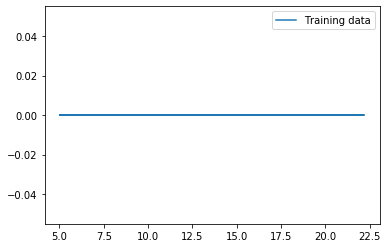

In [12]:
# plot the linear fit
plotData(X[:, 1], y)
plt.plot(X[:, 1], np.dot(X, theta), '-')
plt.legend(['Training data', 'Linear regression']);

Your final values for $\theta$ will also be used to make predictions on profits in areas of 35,000 and 70,000 people.

<div class="alert alert-block alert-success">
Note the way that the following lines use matrix multiplication, rather than explicit summation or looping, to calculate the predictions. This is an example of code vectorization in `numpy`.
</div>

<div class="alert alert-block alert-success">
Note that the first argument to the `numpy` function `dot` is a python list. `numpy` can internally converts **valid** python lists to numpy arrays when explicitly provided as arguments to `numpy` functions.
</div>


In [13]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 0.00

For population = 70,000, we predict a profit of 0.00



### 2.4 Visualizing $J(\theta)$

To understand the cost function $J(\theta)$ better, you will now plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.

In the next cell, the code is set up to calculate $J(\theta)$ over a grid of values using the `computeCost` function that you wrote. After executing the following cell, you will have a 2-D array of $J(\theta)$ values. Then, those values are used to produce surface and contour plots of $J(\theta)$ using the matplotlib `plot_surface` and `contourf` functions. 

The purpose of these graphs is to show you how $J(\theta)$ varies with changes in $\theta_0$ and $\theta_1$. The cost function $J(\theta)$ is bowl-shaped and has a global minimum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of gradient descent moves closer to this point.

/Users/ahmadrayi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: No contour levels were found within the data range.


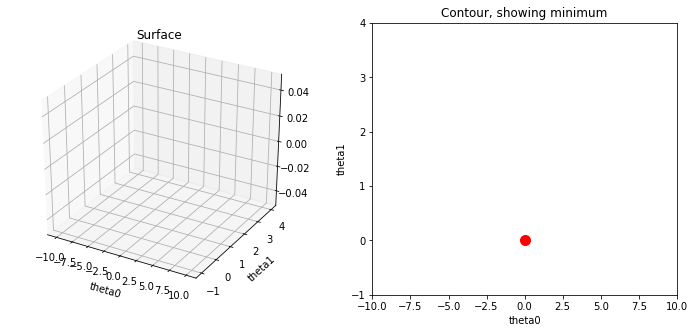

In [14]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
plt.title('Contour, showing minimum')
pass